## Q6: Conway's Game of Life

**Exercise**: Code up Conway's Game of Life using numpy 

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is *really* (really, really) cool.

There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.


In [17]:
import time
import numpy as np
from IPython.display import clear_output

def set_inital_config(grid, N):
    N_2 = int(N/2)

    grid[N_2-1,N_2+1] = 1
    grid[N_2-1,N_2-1] = 1
    grid[N_2,N_2] = 1
    grid[N_2+1,N_2] = 1
    
    return grid

def render(grid):
    FULL = " \u25CF "
    EMPTY = " \u25CB "
    for row in grid:
        print("".join(FULL if cell else EMPTY for cell in row))
    print()

def rules(grid, N):
    neighbors = np.zeros((N, N), dtype=int)

    neighbors[:, :-1]    += grid[:, 1:]
    neighbors[:, 1:]     += grid[:, :-1]
    neighbors[:-1, :]    += grid[1:, :]
    neighbors[1:, :]     += grid[:-1, :]
    neighbors[:-1, :-1]  += grid[1:, 1:]
    neighbors[:-1, 1:]   += grid[1:, :-1]
    neighbors[1:, :-1]   += grid[:-1, 1:]
    neighbors[1:, 1:]    += grid[:-1, :-1]

    new_grid = np.zeros_like(grid)

    new_grid[(grid == 1) & ((neighbors == 2) | (neighbors == 3))] = 1 #check if a cell stays alive
    new_grid[(grid == 0) & (neighbors == 3)] = 1 #check if a cell "reproduce"

    return new_grid


#MAIN
N = 12
grid = np.zeros((N,N), dtype=int)
max_iter = 500
grid = set_inital_config(grid, N)
sleep_time = 1/24 #24fps

for i in range(0,max_iter):
    grid = rules(grid, N)
    clear_output(wait=True)
    print(f"\tGeneration {i}")
    render(grid)
    time.sleep(sleep_time)
    

	Generation 499
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ●  ●  ●  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ●  ○  ○  ○  ○  ○  ●  ○  ○ 
 ○  ○  ○  ●  ○  ○  ○  ○  ○  ●  ○  ○ 
 ○  ○  ○  ●  ○  ○  ○  ○  ○  ●  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ●  ●  ●  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 
 ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○  ○ 



## Q8(L3): Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib

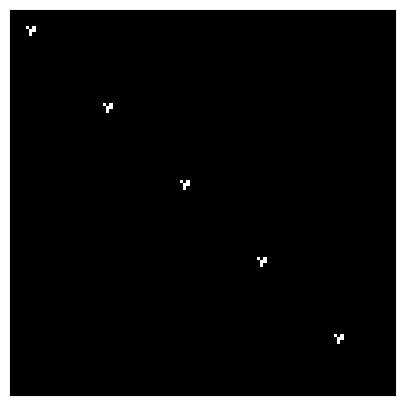

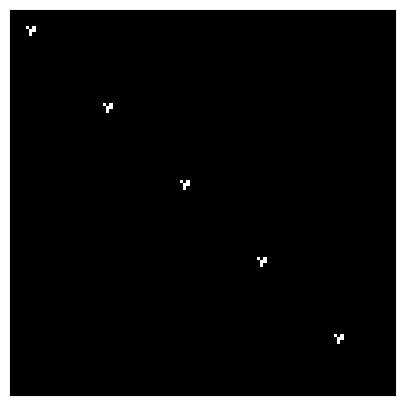

In [26]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def set_initial_config(grid, N, type):
    if type == "4osci" or type == "both":
        N_2 = N // 2
        grid[N_2-1, N_2+1] = 1
        grid[N_2-1, N_2-1] = 1
        grid[N_2, N_2]     = 1
        grid[N_2+1, N_2]   = 1

    if type == "spaceship" or type == "both":
        offset_vert = 0
        offset_ori = 0 
        nspace_max = 5
        for nspace in range (0, nspace_max):
            grid[0+offset_vert,0+offset_ori] = 1
            grid[0+offset_vert,2+offset_ori] = 1
            grid[1+offset_vert,1+offset_ori] = 1
            grid[1+offset_vert,2+offset_ori] = 1
            grid[2+offset_vert,1+offset_ori] = 1

            offset_vert += N//nspace_max
            offset_ori += N//nspace_max

    if type == "random":
        ncell = random.randrange(N,3*N)
        indices = np.random.choice(N*N, ncell, replace=False)
        grid.flat[indices] = 1
        
    return grid

def rules_toroidal(grid):
    #wrap-around PAC-MAN effect
    neighbors = (
        np.roll(grid,  1, axis=0) +  #up
        np.roll(grid, -1, axis=0) +  #down
        np.roll(grid,  1, axis=1) +  #left
        np.roll(grid, -1, axis=1) +  #right
        np.roll(np.roll(grid,  1, axis=0),  1, axis=1) +  #up left
        np.roll(np.roll(grid,  1, axis=0), -1, axis=1) +  #up right
        np.roll(np.roll(grid, -1, axis=0),  1, axis=1) +  #down left
        np.roll(np.roll(grid, -1, axis=0), -1, axis=1)    #down right
    )
    
    new_grid = ((grid == 1) & ((neighbors == 2) | (neighbors == 3))) | ((grid == 0) & (neighbors == 3))
    
    return new_grid.astype(int)


def setup_render_imshow(grid):
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(grid, cmap='Greys_r') #Greys_r for cells in white, Greys for cells in black (background obv != cells)
    ax.set_xticks([])
    ax.set_yticks([])
    #plt.tight_layout()
    display(fig)
    return fig, ax, im

def update_render_imshow(grid, im): #bug !? at the end it renders two figures, cannot be forced to one with plt.show()
    im.set_data(grid)
    plt.gcf().canvas.draw_idle()
    clear_output(wait=True)
    display(plt.gcf())
    
    
#MAIN
N = 120
grid = np.zeros((N, N), dtype=int)
type = "spaceship" #4osci, spaceship, both, random
grid = set_initial_config(grid, N, type)
max_iter = 500
sleep_time = 1/60

fig, ax, im = setup_render_imshow(grid)

for i in range(max_iter):
    grid = rules_toroidal(grid)
    update_render_imshow(grid, im)
    if np.sum(grid) == 0:
        break
    #time.sleep(sleep_time) #kinda useless, it needs to render matplotlib first and it's enough
